#### Importing the data

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Bioavailability_final.csv", low_memory= False)

#### Converting every column to float data type

In [2]:
def convert_columns_to_float(dfn):
    for col in dfn.columns:
        try:
            dfn[col] = dfn[col].astype(float)
        except ValueError:
            dfn.drop(columns=[col], inplace=True)
    return dfn

df = convert_columns_to_float(df)

In [4]:
df.head(5)

,TPSA,NumRotatableBonds,NumHDonors,NumHAcceptors,MolLogP,MolWt,F (%),Permeability,SGF,SIF,Overall Stability
0,143.0,2.0,4.0,10.0,1.6,488.0,16.0,-6.491534,2.0,0.0,0.6
1,287.0,13.0,12.0,18.0,-0.8,488.0,8.5,-6.090240,2.0,0.0,0.6
2,236.0,8.0,9.0,15.0,-2.3,541.0,14.6,-6.712520,2.0,0.0,0.6
3,145.0,10.0,5.0,10.0,3.9,541.0,4.0,-5.444045,2.0,0.0,0.6
4,174.0,12.0,6.0,12.0,4.7,561.0,18.0,-6.157078,2.0,0.0,0.6


In [5]:
df = df.drop(['SGF', 'SIF'], axis =1)

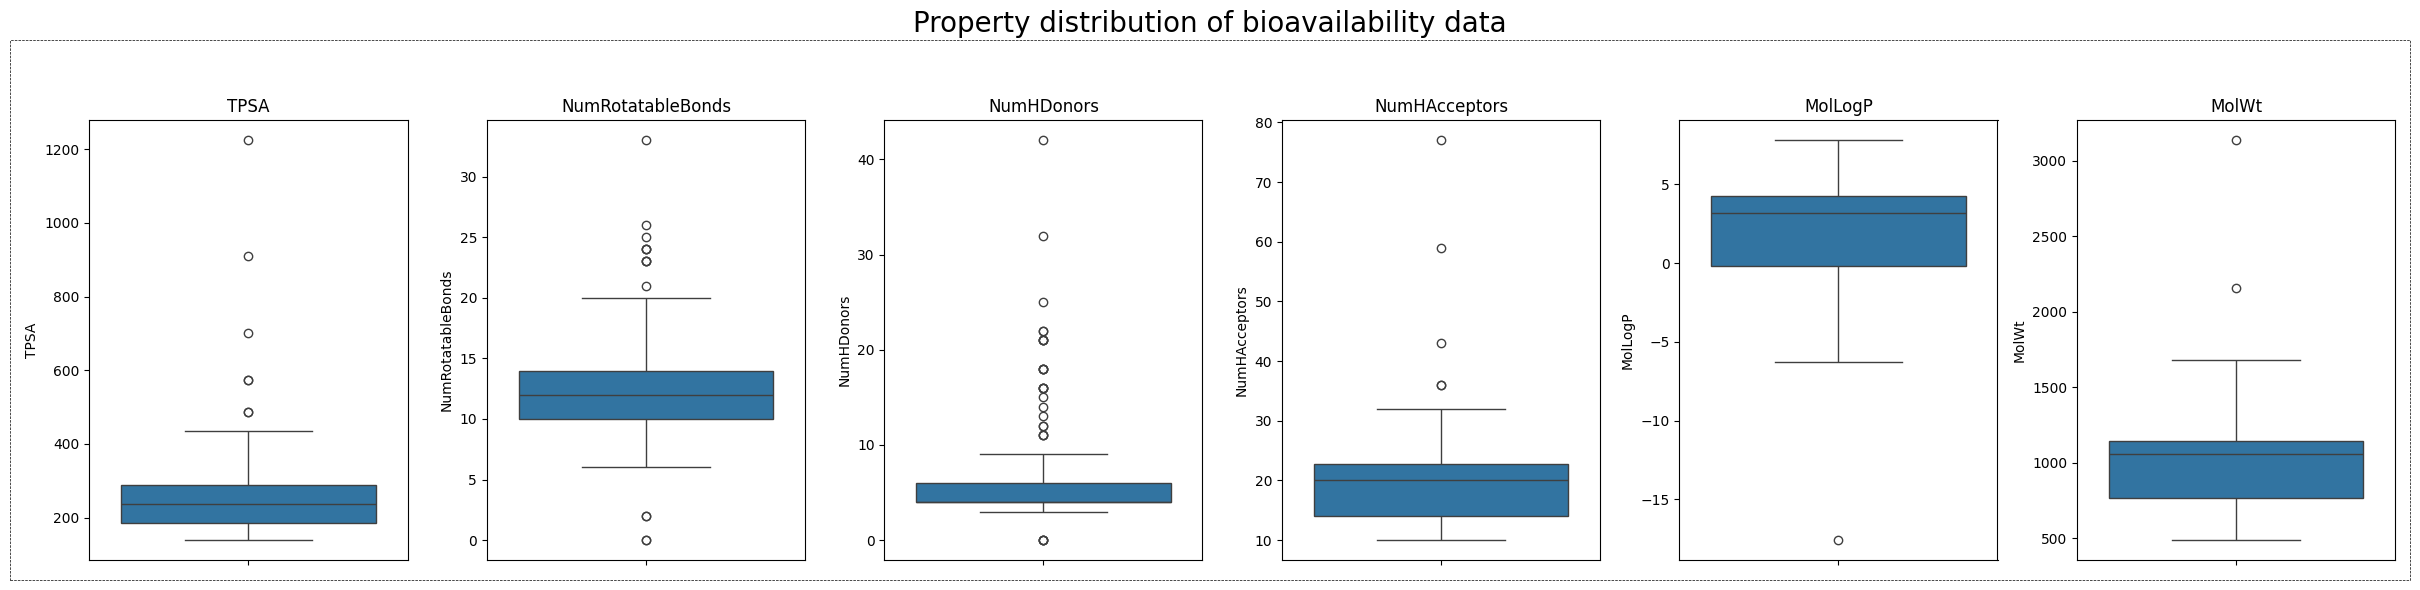

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(24, 6))

columns = ['TPSA', 'NumRotatableBonds', 'NumHDonors', 'NumHAcceptors', 'MolLogP', 'MolWt']

for i, col in enumerate(columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'{col}')

fig.suptitle('Property distribution of bioavailability data', fontsize=20, y= 0.95)

plt.tight_layout(rect=[0, 0, 1, 0.9])

rect = Rectangle((0, 0), 1, 0.9, transform=fig.transFigure, 
                 fill=False, edgecolor='black', linestyle='--', linewidth=0.5)
fig.patches.append(rect)

Text(0, 0.5, 'Distribution')

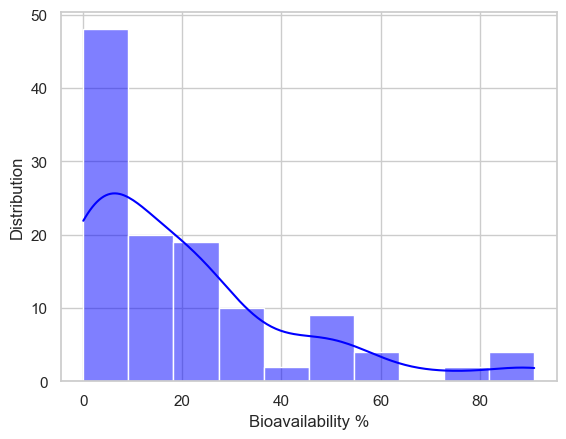

In [29]:
sns.histplot(df['F (%)'], kde=True, color = 'blue',bins=10)

plt.xlabel("Bioavailability %")
plt.ylabel("Distribution")

In [23]:
df.corr()

,TPSA,NumRotatableBonds,NumHDonors,NumHAcceptors,MolLogP,MolWt,F (%),Permeability,Overall Stability
TPSA,1.000000,0.671330,0.898993,0.963691,-0.766734,0.032936,-0.284271,-0.585324,-0.299920
NumRotatableBonds,0.671330,1.000000,0.667540,0.647014,-0.357435,0.002210,-0.222705,-0.353685,-0.177323
NumHDonors,0.898993,0.667540,1.000000,0.758491,-0.875427,-0.044232,-0.447484,-0.620973,-0.402813
NumHAcceptors,0.963691,0.647014,0.758491,1.000000,-0.611307,0.089500,-0.158094,-0.491800,-0.198041
MolLogP,-0.766734,-0.357435,-0.875427,-0.611307,1.000000,0.059881,0.525077,0.559109,0.446496
MolWt,0.032936,0.002210,-0.044232,0.089500,0.059881,1.000000,0.021012,0.193397,0.420099
F (%),-0.284271,-0.222705,-0.447484,-0.158094,0.525077,0.021012,1.000000,0.178207,0.206383
Permeability,-0.585324,-0.353685,-0.620973,-0.491800,0.559109,0.193397,0.178207,1.000000,0.295228
Overall Stability,-0.299920,-0.177323,-0.402813,-0.198041,0.446496,0.420099,0.206383,0.295228,1.000000


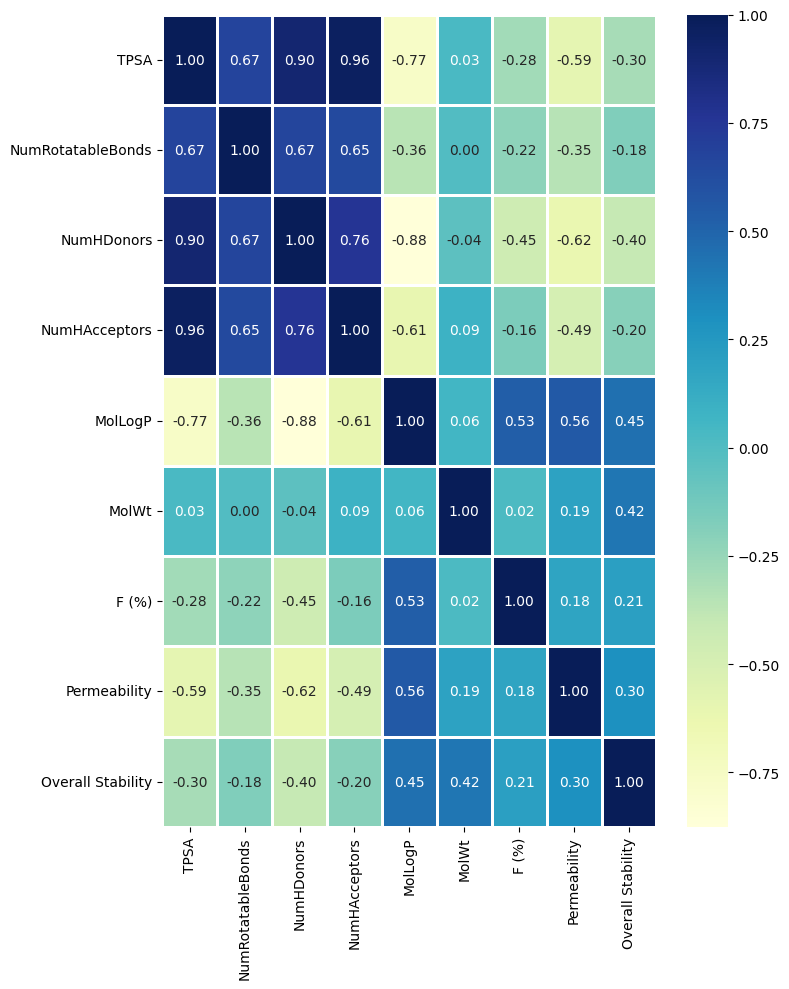

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(8, 10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=1)
plt.tight_layout()

##### A high correlation was found between TPSA, NumHDonors and NumHAcceptors
##### The bioavailability value for most of the values were skewed between 0-1%

#### Dividing input and output columns

In [25]:
X = df.drop(['F (%)'], axis =1)
y = df[['F (%)']]

In [9]:
X.head()

,TPSA,NumRotatableBonds,NumHDonors,NumHAcceptors,MolLogP,MolWt,Permeability,Overall Stability
0,143.0,2.0,4.0,10.0,1.6,488.0,-6.491534,0.6
1,287.0,13.0,12.0,18.0,-0.8,488.0,-6.090240,0.6
2,236.0,8.0,9.0,15.0,-2.3,541.0,-6.712520,0.6
3,145.0,10.0,5.0,10.0,3.9,541.0,-5.444045,0.6
4,174.0,12.0,6.0,12.0,4.7,561.0,-6.157078,0.6


In [10]:
y.head()

,F (%)
0,16.0
1,8.5
2,14.6
3,4.0
4,18.0


#### Scaling using MinMaxScaler
##### Why? because the features were in different ranges and we wanted to scale them in the same range

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [12]:
import pickle
with open('scaler3.pkl', 'wb') as f:
    pickle.dump(scaler, f)

#### Importing xgboost and creating a xgboost object

In [14]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

xgb = XGBRegressor(random_state = 42)

##### Now we are performing the following things:
##### creating performance metrices using make_scorer 
##### using cross_val_score to perform cross validation
##### the metrices are MSE, MAE & r2_score

In [15]:
from sklearn.metrics import make_scorer, mean_squared_error

mse_scorer = make_scorer(mean_squared_error)

mse_scores = cross_val_score(xgb, X, y, cv=5, scoring=mse_scorer)

print("Mean Squared Error (MSE) scores:", mse_scores)
print("Mean MSE:", mse_scores.mean())

Mean Squared Error (MSE) scores: [ 98.1438708  107.38193794 129.35067043 144.95375874 169.89719375]
Mean MSE: 129.9454863321672


In [17]:
from sklearn.metrics import make_scorer, mean_absolute_error

mae_scorer = make_scorer(mean_absolute_error)

mae_scores = cross_val_score(xgb, X, y, cv=5, scoring=mae_scorer)
print(f"MAE Scores: {mae_scores}")
print(f"Mean MAE: {mae_scores.mean()}")

MAE Scores: [5.53879097 7.50725495 8.02722353 6.80919548 9.76946075]
Mean MAE: 7.530385135093892


In [18]:
from sklearn.metrics import make_scorer, r2_score

r2_scorer = make_scorer(r2_score)

r2_scores = cross_val_score(xgb, X, y, cv=5, scoring=r2_scorer)
print(f"R-squared Scores: {r2_scores}")
print(f"Mean R-squared: {r2_scores.mean()}")

R-squared Scores: [0.71869004 0.80359882 0.56831944 0.73119211 0.64905059]
Mean R-squared: 0.6941702008247376


#### Hyperparameter tuning using GridSearchCV

In [14]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_squared_error

xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [50, 100,300,500],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [2, 5, 10],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(estimator=xgb_regressor, 
                           param_grid=param_grid, 
                           scoring=mse_scorer, 
                           cv=5, 
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Mean Squared Error (MSE):", -grid_search.best_score_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50, 'subsample': 1.0}
Best Mean Squared Error (MSE): 79.22735438978678


#### Creating an object of the final model and fitting it

In [11]:
xgr = XGBRegressor(
    colsample_bytree=0.5,
    learning_rate= 0.5,
    max_depth=10,
    n_estimators=50,
    subsample=1.0,
    random_state=42
)                 

In [13]:
xgr.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

#### Recursive feature elimination to find if some feature is responsible for degrading the model performance
##### We performed this same process on all other models but none of them was giving priorities to the features that we selected

In [27]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=xgr, step=1, cv=5, scoring='neg_mean_squared_error')

In [28]:
rfecv.fit(X, y)

RFECV(cv=5,
      estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                             colsample_bylevel=None, colsample_bynode=None,
                             colsample_bytree=0.5, device=None,
                             early_stopping_rounds=None,
                             enable_categorical=False, eval_metric=None,
                             feature_types=None, gamma=None, grow_policy=None,
                             importance_type=None, interaction_constraints=None,
                             learning_rate=0.5, max_bin=None,
                             max_cat_threshold=None, max_cat_to_onehot=None,
                             max_delta_step=None, max_depth=10, max_leaves=None,
                             min_child_weight=None, missing=nan,
                             monotone_constraints=None, multi_strategy=None,
                             n_estimators=50, n_jobs=None,
                             num_parallel_tree=None, random_state=42, ...),
      scoring='neg_mean_squared_error')

#### Saving the model in a pickle file

In [14]:
import pickle
with open('bioavailability_model.pkl', 'wb') as f:
    pickle.dump(xgr, f)

In [29]:
print("Optimal number of features:", rfecv.n_features_)
print("Selected features:", rfecv.support_)
print("Ranking of features:", rfecv.ranking_)

Optimal number of features: 8
Selected features: [ True  True  True  True  True  True  True  True]
Ranking of features: [1 1 1 1 1 1 1 1]


#### As we can see all features are considered important by the model
#### So this is our final model and the final model performance is evaluated using the metrices below

In [30]:
from sklearn.metrics import make_scorer, mean_squared_error

mse_scorer = make_scorer(mean_squared_error)

mse_scores = cross_val_score(xgr, X, y, cv=5, scoring=mse_scorer)

print("Mean Squared Error (MSE) scores:", mse_scores)
print("Mean MSE:", mse_scores.mean())

Mean Squared Error (MSE) scores: [ 11.87181352  28.71215194 175.75387355  60.95981817 118.83911476]
Mean MSE: 79.22735438978678


In [31]:
from sklearn.metrics import make_scorer, mean_absolute_error

mae_scorer = make_scorer(mean_absolute_error)

mae_scores = cross_val_score(xgr, X, y, cv=5, scoring=mae_scorer)
print(f"MAE Scores: {mae_scores}")
print(f"Mean MAE: {mae_scores.mean()}")

MAE Scores: [2.40602425 4.14778966 7.54674722 5.73332998 9.16125304]
Mean MAE: 5.79902883013867


In [32]:
from sklearn.metrics import make_scorer, r2_score

r2_scorer = make_scorer(r2_score)

r2_scores = cross_val_score(xgr, X, y, cv=5, scoring=r2_scorer)
print(f"R-squared Scores: {r2_scores}")
print(f"Mean R-squared: {r2_scores.mean()}")

R-squared Scores: [0.96597177 0.94748557 0.41345847 0.88695371 0.7545191 ]
Mean R-squared: 0.7936777234077453
